Sklearn es una librería incluida en la distribución Anaconda que contiene muchos algoritmos de Machine Learning.

Además, contiene datasets de ejemplo con problemas reales.

In [1]:
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Uno de los datasets es "breast_cancer":

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

En el que el problema es realizar un diagnóstico de cáncer de pecho a diferentes pacientes.

In [0]:
datos = datasets.load_breast_cancer()

In [3]:
datos

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [0]:
# Variables que serán la "entrada" al modelo, la "X":
nombres_atributos = datos["feature_names"]
atributos = datos["data"]

# Columna "target" / "goal" / "clase" (tiene varios nombres equivalentes),
# será la "y" (clase que tiene que predecir el modelo)
clase = datos["target"]
nombres_clases = datos["target_names"]

In [5]:
atributos

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# miramos a continuación cuántos pacientes (filas)
# y cuántos atributos (columnas menos la clase) hay:

atributos.shape

(569, 30)

In [7]:
# ahora miramos cuántos detos de clase hay
# (debería haber tantos como pacientes):

clase.shape

(569,)

In [8]:
nombres_clases

array(['malignant', 'benign'], dtype='<U9')

In [9]:
nombres_atributos

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

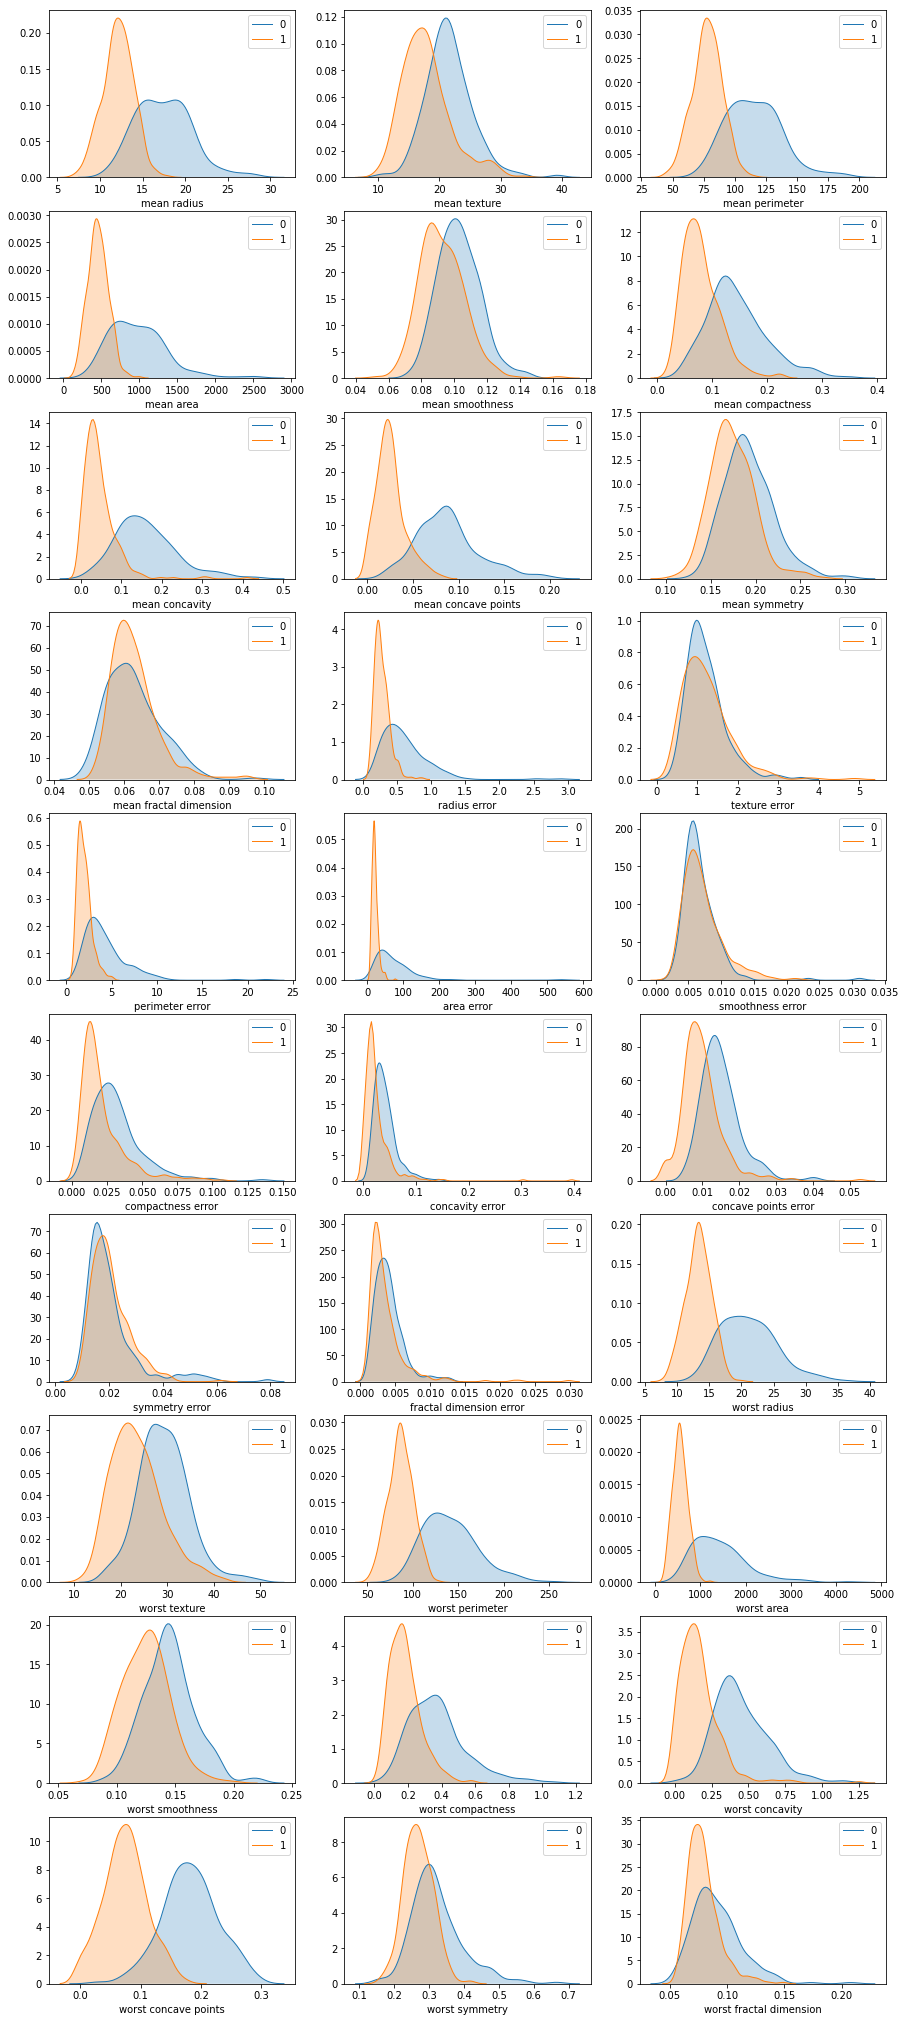

In [10]:
# Análisis exploratorio de datos

plt.figure(figsize=(15,40))

df = pd.DataFrame(atributos, columns=nombres_atributos)
df["clase"] = clase

for i,nombre_atributo in enumerate(nombres_atributos):
    plt.subplot(11,3,i+1)
    if len(np.unique(df[nombre_atributo]))>2:
        for c in np.unique(clase):
            sns.distplot(df[nombre_atributo][df["clase"]==c], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
    else:
        sns.countplot(x=nombre_atributo, hue="clase", data=df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Partimos todos los pacientes en pacientes con los que
# construiremos el modelo ("X_train"), y pacientes con
# los que testearemos el modelo ("X_test"), para evaluar
# cómo de bueno es el modelo en pacientes "nuevos" para él

# Para ello usamos train_test_split, que parte al azar el
# dataset en subconjunto de training, y subconjunto de test:
X_train, X_test, y_train, y_test = train_test_split(atributos, clase,
                                                    test_size=0.3, # el 30% de los casos van al conjunto de test
                                                    random_state=0 # semilla para la partición aleatoria
                                                    )

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [0]:
# Importamos el tipo de modelo que construiremos:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# desviacióón estándar de cada uno de los 30 atributos
# (si hay variables con una desviación estándar mucho
# más grande que otras, influirán mucho más en el modelo)

X_train.std(axis=0)

array([3.59409456e+00, 4.18520801e+00, 2.47381968e+01, 3.66097472e+02,
       1.38986502e-02, 5.09672047e-02, 7.80555484e-02, 3.91671298e-02,
       2.80215355e-02, 6.85255583e-03, 2.93595192e-01, 5.51279556e-01,
       2.10726908e+00, 4.97680341e+01, 2.85769285e-03, 1.68133931e-02,
       2.85405084e-02, 5.85495476e-03, 8.17092006e-03, 2.63430340e-03,
       4.95892851e+00, 6.13973852e+00, 3.44173275e+01, 5.97102337e+02,
       2.29605352e-02, 1.53459603e-01, 1.93006572e-01, 6.56055478e-02,
       6.33597167e-02, 1.79346422e-02])

In [0]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
st.fit(X_train)
X_train2 = st.transform(X_train)
X_test2  = st.transform(X_test)

In [0]:
# creamos un objeto de ese tipo de modelo:
model = KNeighborsClassifier(n_neighbors=111)

In [50]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=111, p=2,
                     weights='uniform')

In [51]:
# construimos el modelo usando los datos de training:
model.fit(X_train2, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=111, p=2,
                     weights='uniform')

In [52]:
# score del modelo con los datos de training
# (1 indica que predice bien el 100% de los casos)
model.score(X_train2, y_train)

0.907035175879397

In [53]:
# score del modelo con los datos de test
# (1 indica que predice bien el 100% de los casos)
model.score(X_test2, y_test)

0.935672514619883

In [22]:
X_train2.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
# Vemos que es el caso. Una posible solución: estandarizar las
# variables para que tengan la misma desviación estándar (lo haremos
# en la próxima sesión)

In [32]:
# Predicción del modelo en pacientes de test:

preds_test = model.predict(X_test2)
preds_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [25]:
# Clases reales de los pacientes de test (si el modelo es perfecto
# tendrían que ser iguales que las predichas):

y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [34]:
(preds_test == y_test).mean()

0.935672514619883

In [35]:
preds_training = model.predict(X_train2)
(preds_training == y_train).mean()

0.9824120603015075

In [26]:
# probabilidad de cada clase (como hay dos clases hay dos columnas)
# para los pacientes de test, según el modelo:

model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [0]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=0.2, max_depth=2,
                             min_samples_leaf=20)

clf = clf.fit(X_train, y_train)

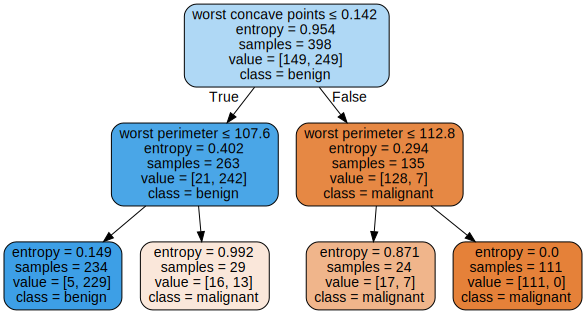

In [56]:
from graphviz import Source

Source( export_graphviz(clf, out_file=None,
                        feature_names=nombres_atributos,
                        class_names=nombres_clases,
                        filled=True, rounded=True,
                        special_characters=True))

In [30]:
# Predictive quality of the model

print("Score training = %f" % (clf.score(X_train, y_train)))
print("Score test = %f" % (clf.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix

print("\nConfusion matrix in test:\n")
print(confusion_matrix(y_test, clf.predict(X_test))) # row: real class; column: predicted class

Score training = 0.937186
Score test = 0.912281

Confusion matrix in test:

[[62  1]
 [14 94]]


In [58]:
clf.predict_proba(X_train)

array([[0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [1.        , 0.        ],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.55172414, 0.44827586],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.55172414, 0.44827586],
       [0.02136752, 0.97863248],
       [1.        , 0.        ],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [1.        , 0.        ],
       [0.70833333, 0.29166667],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.02136752, 0.97863248],
       [0.